In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense,SimpleRNN,Flatten,GRU,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

In [5]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [8]:
i=Input(shape=x_train[0].shape)
x=LSTM(128)(i)
x=Dense(10,activation="softmax")(x)
model=Model(i,x)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']

)

In [11]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0394 - val_accuracy: 0.9895
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0449 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0416 - val_accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0430 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0411 - val_accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0459 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.0519 -

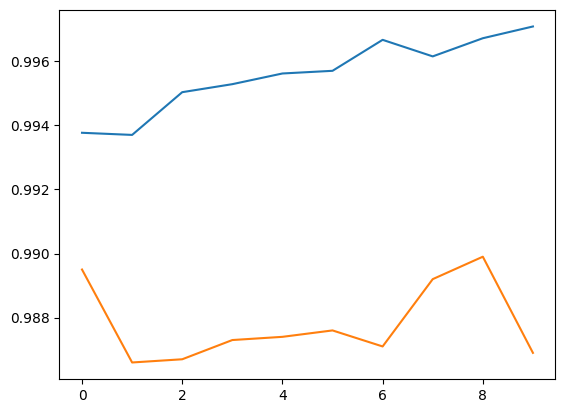

In [12]:
plt.plot(r.history['accuracy'],label="accuracy")
plt.plot(r.history['val_accuracy'],label='val_accuracy')

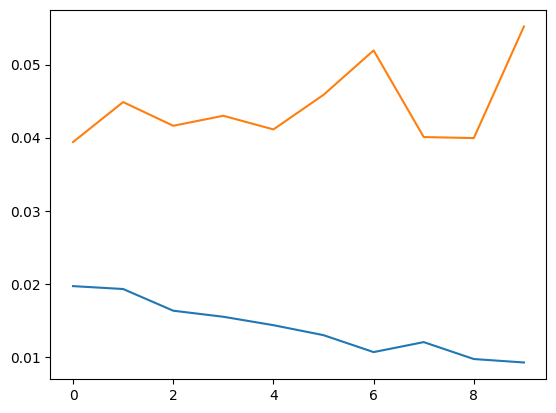

In [13]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label='val_loss')

313/313 [==============================] - 6s 19ms/step
confusion matrix without normalization
cm


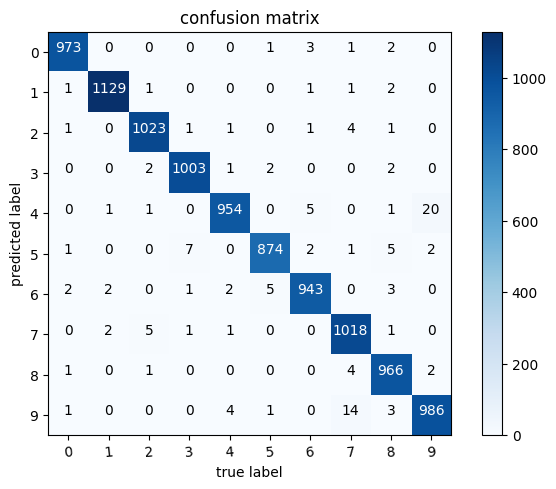

In [14]:
#ploting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalise=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):
  ''' this function prints and plots the confusion matrix
  normalization can be applied by setting normalize=True
  '''
  if normalise:
      cm=cm.astype('float')/cm.sum(axis=1)[:,np.new_axis]
      print("normalize confusion matrix")
  else:
        print("confusion matrix without normalization")
        print("cm")
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=5)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalise else "d"
  thresh=cm.max()/2
  for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white'if cm[i,j] >thresh else "black" )
  plt.tight_layout()
  plt.xlabel("true label")
  plt.ylabel('predicted label')
  plt.show()



p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'true label: 7 predicted: 8')

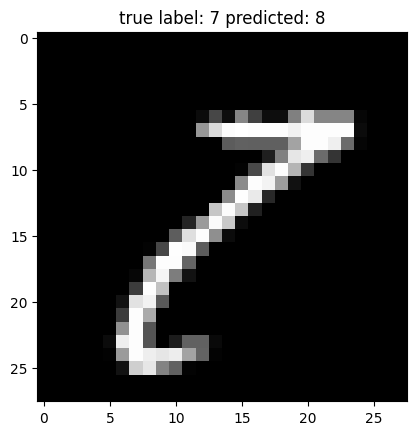

In [15]:
#show some misclassified example
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("true label: %s predicted: %s"%(y_test[i],p_test[i]))